In [1]:
!pip install tensorflow -q

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
                                                                    test_size = 0.2, random_state =42)

In [4]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <a list of 10 Patch objects>)

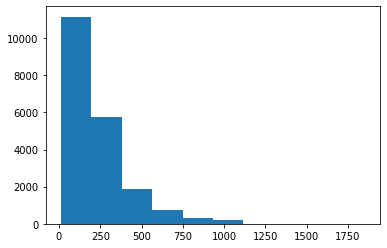

In [5]:
import matplotlib.pyplot as plt
plt.hist(lengths)

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)

In [7]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [8]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100,500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [9]:
train_oh = keras.utils.to_categorical(train_seq)

In [10]:
train_oh.shape

(20000, 100, 500)

In [11]:
len(train_oh[0][0])

500

In [12]:
val_oh = keras.utils.to_categorical(val_seq)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_oh, train_target, epochs = 10, batch_size = 64, 
                    validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/10
313/313 [==============================] - 15s 40ms/step - loss: 0.7044 - accuracy: 0.4987 - val_loss: 0.7025 - val_accuracy: 0.4936
Epoch 2/10
313/313 [==============================] - 12s 39ms/step - loss: 0.6982 - accuracy: 0.5103 - val_loss: 0.6981 - val_accuracy: 0.5056
Epoch 3/10
313/313 [==============================] - 12s 40ms/step - loss: 0.6938 - accuracy: 0.5214 - val_loss: 0.6949 - val_accuracy: 0.5152
Epoch 4/10
313/313 [==============================] - 12s 39ms/step - loss: 0.6903 - accuracy: 0.5317 - val_loss: 0.6922 - val_accuracy: 0.5232
Epoch 5/10
313/313 [==============================] - 14s 43ms/step - loss: 0.6871 - accuracy: 0.5444 - val_loss: 0.6899 - val_accuracy: 0.5316
Epoch 6/10
313/313 [==============================] - 12s 39ms/step - loss: 0.6841 - accuracy: 0.5547 - val_loss: 0.6877 - val_accuracy: 0.5396
Epoch 7/10
313/313 [==============================] - 12s 39ms/step - loss: 0.6812 - accuracy: 0.5645 - val_loss: 0.6854 - val_accuracy:

# 단어 임베딩

In [26]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100)) 
# 어휘 사전 top 500, 16 : 임베딩 벡터 크기, input_length : 입력 시퀀스 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

In [27]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________
